© 版权所有 Wenting Tu

In [3]:
import warnings 
warnings.filterwarnings("ignore")

# <b><span style='color:#F1C40F'>|</span> 模型评估与选择</b>
<b></b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>构造实验数据</b></p>
</div>


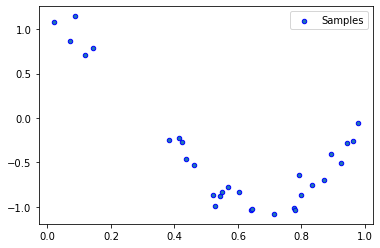

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.legend() 
plt.show()


<b></b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>利用Pipeline实现Polynomial Regression</b></p>
</div>

- 先尝试用degree=15的PolynomialFeatures配合LinearRegression

Polynomia Regression with Degree 15: MSE is 1.83e+08


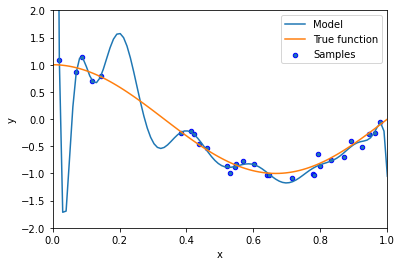

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


degree = 15

pipeline = Pipeline([
                     ("polynomial_features", PolynomialFeatures(degree=degree, include_bias=False)),
                     ("linear_regression", LinearRegression())
                    ])

pipeline.fit(X[:, np.newaxis], y)

scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

print("Polynomia Regression with Degree {}: MSE is {:.2e}".format(degree, -scores.mean()))

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend() 
plt.show()

- 再尝试用degree=2的PolynomialFeatures配合LinearRegression

Polynomial Regression with Degree 2: MSE is 5.82e-02


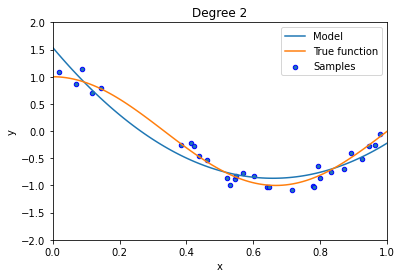

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


degree = 2

pipeline = Pipeline([
                     ("polynomial_features", PolynomialFeatures(degree=degree, include_bias=False)),
                     ("linear_regression", LinearRegression())
                    ])

pipeline.fit(X[:, np.newaxis], y)

scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

print("Polynomial Regression with Degree {}: MSE is {:.2e}".format(degree, -scores.mean()))

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.title("Degree {}".format(degree))
plt.legend() 
plt.show()

- 再尝试用degree=15的PolynomialFeatures配合Ridge

Polynomial Regression (Ridge) with Degree 15: MSE is 2.20e-01


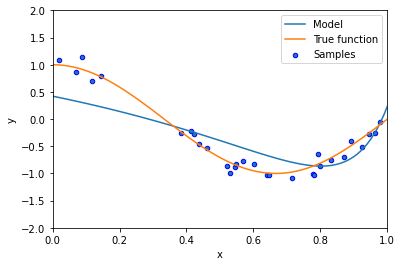

In [7]:

from sklearn.linear_model import  Ridge

degree = 15

pipeline = Pipeline([
                     ("polynomial_features", PolynomialFeatures(degree=degree, include_bias=False)),
                     ("linear_regression", Ridge())
                    ])


pipeline.fit(X[:, np.newaxis], y)

scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

print("Polynomial Regression (Ridge) with Degree {}: MSE is {:.2e}".format(degree, -scores.mean()))


X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend() 
plt.show()


<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>超参数调节</b></p>
</div>


In [8]:
PolynomialFeatures().get_params().keys()

dict_keys(['degree', 'include_bias', 'interaction_only', 'order'])

In [9]:
Ridge().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])

In [10]:
from sklearn.pipeline import make_pipeline
make_pipeline(PolynomialFeatures(), Ridge()).get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'polynomialfeatures', 'ridge', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'polynomialfeatures__order', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__normalize', 'ridge__positive', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])

In [11]:
param_grid = [
  {'polynomialfeatures__degree': [1, 5, 15], 'ridge__alpha': [0.0, 0.01, 0.1, 1.0]}
 ]
from sklearn.model_selection import GridSearchCV
pipeline = make_pipeline(PolynomialFeatures(), Ridge())
reg = GridSearchCV(pipeline, param_grid, scoring="neg_mean_squared_error", cv=10)

In [12]:
reg.fit(X[:, np.newaxis], y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid=[{'polynomialfeatures__degree': [1, 5, 15],
                          'ridge__alpha': [0.0, 0.01, 0.1, 1.0]}],
             scoring='neg_mean_squared_error')

In [13]:
reg.best_params_

{'polynomialfeatures__degree': 5, 'ridge__alpha': 0.01}

Polynomia Regression with Degree 5: MSE is 2.12e-02


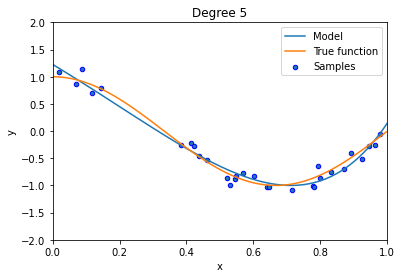

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


degree = 5

pipeline = Pipeline([
                     ("polynomial_features", PolynomialFeatures(degree=degree, include_bias=False)),
                     ("linear_regression", Ridge(alpha=0.01))
                    ])

pipeline.fit(X[:, np.newaxis], y)

scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

print("Polynomia Regression with Degree {}: MSE is {:.2e}".format(degree, -scores.mean()))

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.title("Degree {}".format(degree))
plt.legend() 
plt.show()


<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>更多阅读材料</b></p>
</div>


- 更多模型评估与选择的实现请参考: https://scikit-learn.org/stable/model_selection.html

- 更多关于Pipeline的实现：https://scikit-learn.org/stable/modules/compose.html